# Importing libraries

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Database Connection

In [2]:
connection=sqlite3.connect('olist.sqlite')
cursor=connection.cursor()

In [3]:
tables=cursor.execute("Select name from sqlite_master where type='table'").fetchall()
tables

[('product_category_name_translation',),
 ('sellers',),
 ('customers',),
 ('geolocation',),
 ('order_items',),
 ('order_payments',),
 ('order_reviews',),
 ('orders',),
 ('products',),
 ('leads_qualified',),
 ('leads_closed',)]

In [4]:
for each in tables:
    print(each[0])

product_category_name_translation
sellers
customers
geolocation
order_items
order_payments
order_reviews
orders
products
leads_qualified
leads_closed


In [5]:
for each in tables:
    print(each[0])
    print(pd.read_sql_query(f"Select * from {each[0]}",connection))
    print()

product_category_name_translation
            product_category_name product_category_name_english
0                    beleza_saude                 health_beauty
1          informatica_acessorios         computers_accessories
2                      automotivo                          auto
3                 cama_mesa_banho                bed_bath_table
4                moveis_decoracao               furniture_decor
..                            ...                           ...
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

[71 rows x 2 columns]

sellers
                             seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68

# Getting thorough overview of each table
- product_category_name_translation
- sellers
- customers
- geolocation
- order_items
- order_payments
- order_reviews
- orders
- products
- leads_qualified
- leads_closed

## Product Category name translation table
- So we have prodcts of 71 different categories

In [6]:
# product_Category_name_translation: The product names are originally in portugese
product_category_name_translation=pd.read_sql_query("Select * from product_category_name_translation",connection).reset_index()
product_category_name_translation

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor
...,...,...,...
66,66,flores,flowers
67,67,artes_e_artesanato,arts_and_craftmanship
68,68,fraldas_higiene,diapers_and_hygiene
69,69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [7]:
# PREPROCESSING table category_name_translation
product_category_name_translation.isnull().sum()
product_category_name_translation['product_category_name_english'].nunique()

71

# Sellers table
- sellers belongs to 23 different states of brazil

In [8]:
# Sellers table
sellers=pd.read_sql_query("Select * from sellers",connection).reset_index()
sellers

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...,...
3090,3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [9]:
# preprocessing tables
sellers.isnull().sum() # no null value
sellers.drop_duplicates() # no duplicates
sellers['seller_state'].nunique()
seller_states=sellers['seller_state'].unique() # printing 23 states of sellers in order so that can be compared with 27 states of customer.

## Customers table
- This count represents the actual number of unique customers in the dataset, meaning 3,345 customers (99,441 -96,096 = 3,345) placed more than one order.
- The sellers were of 23 states while customers belongs to 27 states, those four states where sellers are not available are ['AP', 'AL', 'TO', 'RR']. 
- There is no seller in any state where customers are not available, so position of sellers is good.

In [10]:
# Customers table
customers=pd.read_sql_query("Select * from customers",connection).reset_index()
customers['customer_id'].nunique() # 99441
customers['customer_unique_id'].nunique() # 96096
customers['customer_state'].nunique()  # 27, 3 states don't have 
customer_states=customers['customer_state'].unique()
customers


,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...,...
99436,99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [11]:
# Identifying those four states with customers but no seller
sellerless_states=[]
for each in customer_states:
    if each not in seller_states:
        sellerless_states.append(each)

print(sellerless_states)

['AP', 'AL', 'TO', 'RR']


## Geolocation table
- As i considers geolocation as unimportant for intermediate level analysis so that's why iam not working on it any more
- Geolocation of all 27 states is provided

In [12]:
geolocation=pd.read_sql_query("select * from geolocation",connection).reset_index()
geolocation

,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0,1037,-23.545621,-46.639292,sao paulo,SP
1,1,1046,-23.546081,-46.644820,sao paulo,SP
2,2,1046,-23.546129,-46.642951,sao paulo,SP
3,3,1041,-23.544392,-46.639499,sao paulo,SP
4,4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...,...
1000158,1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [13]:
geolocation.isnull().sum()
geolocation['geolocation_state'].nunique()

27

##  Order_items table

In [14]:
order_items=pd.read_sql_query("Select * from order_items",connection).reset_index()
order_items.drop("index",axis=1,inplace=True)
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [15]:
# Thorough analysis and preprocessing of order_items table
order_items.dtypes

# converting data type of shipping_limit_date from object to datetime
order_items['shipping_limit_date']=pd.to_datetime(order_items['shipping_limit_date'])

# understanding order_id and order_item_id columns and their difference
order_items['order_id'].nunique() # 98666 orders were mentioned, it serves as foreign key for orders table

order_items['order_item_id'].nunique()  # 21 unique items were ordered , order_id and order_item_id forms composite primary key

21

In [16]:
order_items.loc[order_items['order_id']=='00526a9d4ebde463baee25f386963ddc']  # in same order the customer ordered same product from same seller but 4 times
order_items.loc[order_items['seller_id']=='7210cd29727d674c00741e5e387b3ccd']


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
137,00526a9d4ebde463baee25f386963ddc,1,0c4a0f8ab44f9acd2d04e7024f9ba362,7210cd29727d674c00741e5e387b3ccd,2018-08-14 22:15:22,33.89,8.40
138,00526a9d4ebde463baee25f386963ddc,2,0c4a0f8ab44f9acd2d04e7024f9ba362,7210cd29727d674c00741e5e387b3ccd,2018-08-14 22:15:22,33.89,8.40
139,00526a9d4ebde463baee25f386963ddc,3,0c4a0f8ab44f9acd2d04e7024f9ba362,7210cd29727d674c00741e5e387b3ccd,2018-08-14 22:15:22,33.89,8.40
140,00526a9d4ebde463baee25f386963ddc,4,0c4a0f8ab44f9acd2d04e7024f9ba362,7210cd29727d674c00741e5e387b3ccd,2018-08-14 22:15:22,33.89,8.40
30115,4461b95e70e309fde34dd20048ecc0dd,1,836c9611edefc9a7015fc464453ed246,7210cd29727d674c00741e5e387b3ccd,2018-07-31 17:04:22,64.99,8.62
35667,50bfdb0627807130b8f989106c985a75,1,dc7b5d2b32ae30c86acd229b5ff34dcc,7210cd29727d674c00741e5e387b3ccd,2018-08-14 10:05:15,63.00,18.99
74452,a9a6b38d59cf5f6c56d86dc3513a9bb9,1,f813e301b61b001b6baac3a54b9acfe2,7210cd29727d674c00741e5e387b3ccd,2018-08-23 04:50:24,29.98,8.37
78180,b1e7ea6ef4104c3bcd94c0b9260717b2,1,836c9611edefc9a7015fc464453ed246,7210cd29727d674c00741e5e387b3ccd,2018-07-16 14:46:14,64.99,8.62
79200,b42c3979ca033193016394e37f74d668,1,8e45f326187b3e85211143797e4bd30d,7210cd29727d674c00741e5e387b3ccd,2018-07-17 13:46:35,129.89,9.07
93747,d4783ba848b3f01d54e6ad0fd20b5f0c,1,396bf7d8b2215de13a3332d2426e2abb,7210cd29727d674c00741e5e387b3ccd,2018-06-14 13:30:33,64.99,12.89


In [17]:
# understanding order_id "ccf804e764ed5650cd8759557269dc13" in order_items table
order_items[order_items['order_id']=="ccf804e764ed5650cd8759557269dc13"]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
90242,ccf804e764ed5650cd8759557269dc13,1,8d37ee446981d3790967d0268d6cfc81,1900267e848ceeba8fa32d80c1a5f5a8,2017-06-15 16:15:08,49.99,12.69


## Orders table

In [18]:
orders=pd.read_sql_query("Select * from orders",connection).reset_index()
orders.drop("index",axis=1,inplace=True)
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [19]:
# changing data types
orders.dtypes
orders['order_approved_at']=pd.to_datetime(orders['order_approved_at'])
orders['order_purchase_timestamp']=pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_carrier_date']=pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date']=pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date']=pd.to_datetime(orders['order_estimated_delivery_date'])

In [20]:
# Thorough analysis of orders table
orders.dtypes
orders['order_status'].unique()  # the explanation of different status is given in project report

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [21]:
# checking order id "ccf804e764ed5650cd8759557269dc13" in different tables so that we can understand behavior of different tables
orders[orders['order_id']=='ccf804e764ed5650cd8759557269dc13']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
77686,ccf804e764ed5650cd8759557269dc13,92cd3ec6e2d643d4ebd0e3d6238f69e2,delivered,2017-06-07 12:05:10,2017-06-09 16:15:08,2017-06-16 15:50:28,2017-06-22 16:04:46,2017-06-28


- product_category_name_translation
- sellers
- customers
- geolocation
- order_items
- order_payments
- order_reviews
- orders
- products
- leads_qualified
- leads_closed

## order_payments table
- The payment_sequential column in a payment table (such as the Olist dataset) is a sequence number used to identify multiple payment transactions associated with a single order. 
- Most of the transactions are done using credit card
- Most of the payments are done in single installment.
- Zero value in paymnet installments means the amount due for an installment was fully covered by a credit memo or overpayment from a previous period, resulting in a net zero amount for that installment.
- Payment_value column represents Per payment entry: An order might have multiple payment entries (indicated by the payment_sequential column) if the customer used different payment methods or split the payment. In such cases, each row's payment_value represents the value of that specific payment transaction.
- Currency: The values are in Brazilian Real (BRL), as Olist is a Brazilian e-commerce platform.
- Purpose in analysis: This column(payment_value) is crucial for financial analysis, calculating total revenue, average order value, and performing customer segmentation (e.g., Monetary value in RFM analysis). 
- Sum of price and freight_value(in order_items table) is equal to sum of all payment_values for a specific order in order_payments table.

In [22]:
order_payments=pd.read_sql_query("Select * from order_payments",connection).reset_index()
order_payments.drop("index",axis=1,inplace=True)
order_payments[order_payments['order_id']=='b81ef226f3fe1789b1e8b2acac839d17']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [23]:
order_payments['payment_sequential'].unique()
order_payments.loc[order_payments['order_id']=='ccf804e764ed5650cd8759557269dc13']
#order_payments.loc[order_payments['payment_sequential']==20]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4346,ccf804e764ed5650cd8759557269dc13,19,voucher,1,1.68
14362,ccf804e764ed5650cd8759557269dc13,1,credit_card,1,2.20
16279,ccf804e764ed5650cd8759557269dc13,14,voucher,1,0.97
18876,ccf804e764ed5650cd8759557269dc13,15,voucher,1,1.11
21447,ccf804e764ed5650cd8759557269dc13,6,voucher,1,2.26
32393,ccf804e764ed5650cd8759557269dc13,26,voucher,1,23.10
38001,ccf804e764ed5650cd8759557269dc13,2,voucher,1,1.45
39132,ccf804e764ed5650cd8759557269dc13,25,voucher,1,1.53
40369,ccf804e764ed5650cd8759557269dc13,5,voucher,1,2.69
40387,ccf804e764ed5650cd8759557269dc13,3,voucher,1,1.15


In [24]:
order_payments['payment_type'].value_counts() 
order_payments['payment_installments'].value_counts() 

payment_installments
1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: count, dtype: int64

In [25]:
# understanding payment_installments is equal to zero
order_payments[order_payments['payment_installments']==0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


## Product Table
- product_description_length shows number of characters not no of words
- PRAGMA table_info() statement, which is the standard way to retrieve column details for a specific table in SQLite. 

In [26]:
pd.read_sql_query("Select * from products",connection)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [27]:
# changing column names as they are not written right
pd.read_sql_query("Alter table products rename column product_name_lenght to product_name_length",connection)
pd.read_sql_query("Alter table products rename column product_description_lenght to product_description_length",connection)

DatabaseError: Execution failed on sql 'Alter table products rename column product_name_lenght to product_name_length': no such column: "product_name_lenght"

In [ ]:
# getting data type of all columns
pd.read_sql_query("pragma table_info('products')",connection)

,cid,name,type,notnull,dflt_value,pk
0,0,product_id,TEXT,0,None,0
1,1,product_category_name,TEXT,0,None,0
2,2,product_name_length,REAL,0,None,0
3,3,product_description_length,REAL,0,None,0
4,4,product_photos_qty,REAL,0,None,0
5,5,product_weight_g,REAL,0,None,0
6,6,product_length_cm,REAL,0,None,0
7,7,product_height_cm,REAL,0,None,0
8,8,product_width_cm,REAL,0,None,0


In [ ]:
products=pd.read_sql_query("Select * from products",connection).reset_index()

In [ ]:
products.shape

(32951, 10)

In [ ]:
# To convert the data type using astype we need to fill missing values first
products.isnull().sum().sort_values(ascending=False)
products['product_category_name']=products['product_category_name'].fillna(products['product_category_name'].mode()[0])
products['product_name_length']=products['product_name_length'].fillna(products['product_name_length'].mode()[0])
products['product_description_length']=products['product_description_length'].fillna(products['product_description_length'].mode()[0])
products['product_photos_qty']=products['product_photos_qty'].fillna(products['product_photos_qty'].mode()[0])
products.dropna(inplace=True)


In [ ]:
products.isnull().sum().sort_values(ascending=False)

index                         0
product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [ ]:
# Changing float columns in int
products['product_photos_qty']=products['product_photos_qty'].astype('int32')
products['product_name_length']=products['product_name_length'].astype('int32')
products['product_description_length']=products['product_description_length'].astype('int32')
products.dtypes

index                           int64
product_id                     object
product_category_name          object
product_name_length             int32
product_description_length      int32
product_photos_qty              int32
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

## leads_qualified table
- origin column: The source of the lead, such as a specific marketing campaign, trade show, or social media platform.

In [ ]:
# reading leads_qualified column
leads_qualified=pd.read_sql_query("select * from leads_qualified",connection)
leads_qualified['origin'].value_counts()

origin
organic_search       2296
paid_search          1586
social               1350
unknown              1099
direct_traffic        499
email                 493
referral              284
other                 150
display               118
other_publicities      65
Name: count, dtype: int64

In [ ]:
# filling missing values
leads_qualified.isnull().sum()
leads_qualified['origin']=leads_qualified['origin'].fillna(leads_qualified['origin'].mode()[0])

In [ ]:
# converting data type of first_contact_date from object to datetime
leads_qualified['first_contact_date']=pd.to_datetime(leads_qualified['first_contact_date'])
leads_qualified.dtypes
leads_qualified.shape

(8000, 4)

## leads_closed table
- there are total 8000 leads who were interested and only 842 of them could be converted in to customers which becomes 10.5%.
- total 842 leads closed by 842 sellers no seller closed more than one lead and total 32 sales development representatives made possible to close 842 leads.
- 92% of closed leads information regarding they have company or not, have gtin, average stock is not provided.
- for 91.8% of closed leads product_catalog_size is not described.
- 

In [ ]:
leads_closed=pd.read_sql_query("select * from leads_closed",connection)
leads_closed.shape


(842, 14)

In [ ]:
leads_closed.columns

Index(['mql_id', 'seller_id', 'sdr_id', 'sr_id', 'won_date',
       'business_segment', 'lead_type', 'lead_behaviour_profile',
       'has_company', 'has_gtin', 'average_stock', 'business_type',
       'declared_product_catalog_size', 'declared_monthly_revenue'],
      dtype='object')

In [ ]:
# checking whether leads in leads_qualified table are the one who converted in customer or the customers are different from leads
list_of_leads_qualified=list(leads_qualified['mql_id'])
list_of_leads_qualified

list_of_leads_closed=list(leads_closed['mql_id'])
list_of_leads_closed

list_of_leads_converted=[]

for each in list_of_leads_closed:
    if each in list_of_leads_qualified:
        list_of_leads_converted.append(each)

print("total leads converted are",len(list_of_leads_converted))  # will tell no of leads successfully converted into the customers
print(list_of_leads_converted==list_of_leads_closed)  # are the customers also included in leads table

total leads converted are 842
True


In [ ]:
# filling missing values
leads_closed.isnull().sum().sort_values(ascending=False)

leads_closed['has_company']=leads_closed['has_company'].fillna('not mentioned')

leads_closed['has_gtin']=leads_closed['has_gtin'].fillna('not mentioned')

leads_closed['average_stock']=leads_closed['average_stock'].fillna('not mentioned')

leads_closed['declared_product_catalog_size']=leads_closed['declared_product_catalog_size'].fillna(leads_closed['declared_product_catalog_size'].mode()[0])

leads_closed['lead_behaviour_profile']=leads_closed['lead_behaviour_profile'].fillna('not mentioned')

leads_closed['business_type']=leads_closed['business_type'].fillna('Unknown')

leads_closed['business_segment']=leads_closed['business_segment'].fillna('Unknown')

leads_closed['lead_type']=leads_closed['lead_type'].fillna('Unknown')

leads_closed.isnull().sum()

mql_id                           0
seller_id                        0
sdr_id                           0
sr_id                            0
won_date                         0
business_segment                 0
lead_type                        0
lead_behaviour_profile           0
has_company                      0
has_gtin                         0
average_stock                    0
business_type                    0
declared_product_catalog_size    0
declared_monthly_revenue         0
dtype: int64

In [ ]:
# Converting data type of different columns
leads_closed['declared_product_catalog_size']=leads_closed['declared_product_catalog_size'].astype('float16')
leads_closed['won_date']=pd.to_datetime(leads_closed['won_date'])

In [ ]:
leads_closed.dtypes

mql_id                                   object
seller_id                                object
sdr_id                                   object
sr_id                                    object
won_date                         datetime64[ns]
business_segment                         object
lead_type                                object
lead_behaviour_profile                   object
has_company                              object
has_gtin                                 object
average_stock                            object
business_type                            object
declared_product_catalog_size           float16
declared_monthly_revenue                float64
dtype: object

In [ ]:
# counting no of sellers and sales development representatives involved in making leads closed. 
leads_closed['sdr_id'].nunique()  # 32
leads_closed['seller_id'].count() # 842

np.int64(842)

In [ ]:
leads_closed['business_type'].value_counts()

business_type
reseller        587
manufacturer    242
Unknown          10
other             3
Name: count, dtype: int64

# Saving the tables in csv format for creating its dashboard in powerbi

In [ ]:
# product_category_name_translation
product_category_name_translation_csv=product_category_name_translation[['product_category_name','product_category_name_english']]
product_category_name_translation_csv.to_csv("csv files/product_category_name_translation.csv",index=False)

In [ ]:
# sellers
sellers=sellers[['seller_id','seller_state','seller_city']]
sellers.to_csv("csv files/sellers.csv",index=False)

In [ ]:
# products
products_csv=products[['product_id','product_category_name','product_name_length','product_description_length','product_photos_qty']]
products_csv.to_csv("csv files/products.csv",index=False)

In [ ]:
# customers
customers_csv=customers[['customer_id','customer_unique_id','customer_city','customer_state']]
customers_csv.to_csv("csv files/customers.csv",index=False)

In [ ]:
# order_items
order_items.to_csv("csv files/order_items.csv",index=False)

In [ ]:
# orders
orders.to_csv("csv files/orders.csv",index=False)

In [ ]:
# order_payments
order_payments.to_csv("csv files/order_payments.csv",index=False)

In [ ]:
# leads_qualified
leads_qualified_csv=leads_qualified.drop('landing_page_id',axis=1)
leads_qualified_csv.to_csv("csv files/leads_qualified.csv",index=False)

In [ ]:
# leads cancelled
leads_closed_csv=leads_closed.drop(['sdr_id','lead_behaviour_profile','has_company','has_gtin','average_stock'],axis=1)
leads_closed_csv.to_csv("csv files/leads_cloased.csv",index=False)
# we are removing has_company,has_gtin,average_stock b/c 92% of their data is missing, that may mislead our decision

# Getting business questions answered

In [ ]:
# Finding the top 10 selling categories of the store w.r.t total_amount_earned
top_10_categories_wrt_revenue=pd.read_sql_query("""Select product_category_name_english,
                                  sum(price+freight_value) as total_price
                                  from order_items as ot
                                  inner join
                                  products as p
                                  on 
                                  p.product_id=ot.product_id
                                  inner join
                                  product_category_name_translation as pcnt
                                  on
                                  pcnt.product_category_name=p.product_category_name
                                  group by 
                                  product_category_name_english          
                                  ORDER BY total_price
                                  DESC limit 10""",connection)
top_10_categories_wrt_revenue

,product_category_name_english,total_price
0,health_beauty,1441248.07
1,watches_gifts,1305541.61
2,bed_bath_table,1241681.72
3,sports_leisure,1156656.48
4,computers_accessories,1059272.40
5,furniture_decor,902511.79
6,housewares,778397.77
7,cool_stuff,719329.95
8,auto,685384.32
9,garden_tools,584219.21


In [ ]:
top_10_categories_wrt_orders=pd.read_sql_query("""Select product_category_name_english,
                                  sum(price+freight_value) as total_price,
                                  count(order_id) as total_orders
                                  from order_items as ot
                                  inner join
                                  products as p
                                  on 
                                  p.product_id=ot.product_id
                                  inner join
                                  product_category_name_translation as pcnt
                                  on
                                  pcnt.product_category_name=p.product_category_name
                                  group by 
                                  product_category_name_english          
                                  ORDER BY total_orders
                                  DESC limit 10""",connection)
top_10_categories_wrt_orders

# six to seven categories are same in top 10 list of categories w.r.t both revenue and orders

,product_category_name_english,total_price,total_orders
0,bed_bath_table,1241681.72,11115
1,health_beauty,1441248.07,9670
2,sports_leisure,1156656.48,8641
3,furniture_decor,902511.79,8334
4,computers_accessories,1059272.40,7827
5,housewares,778397.77,6964
6,watches_gifts,1305541.61,5991
7,telephony,394883.32,4545
8,garden_tools,584219.21,4347
9,auto,685384.32,4235


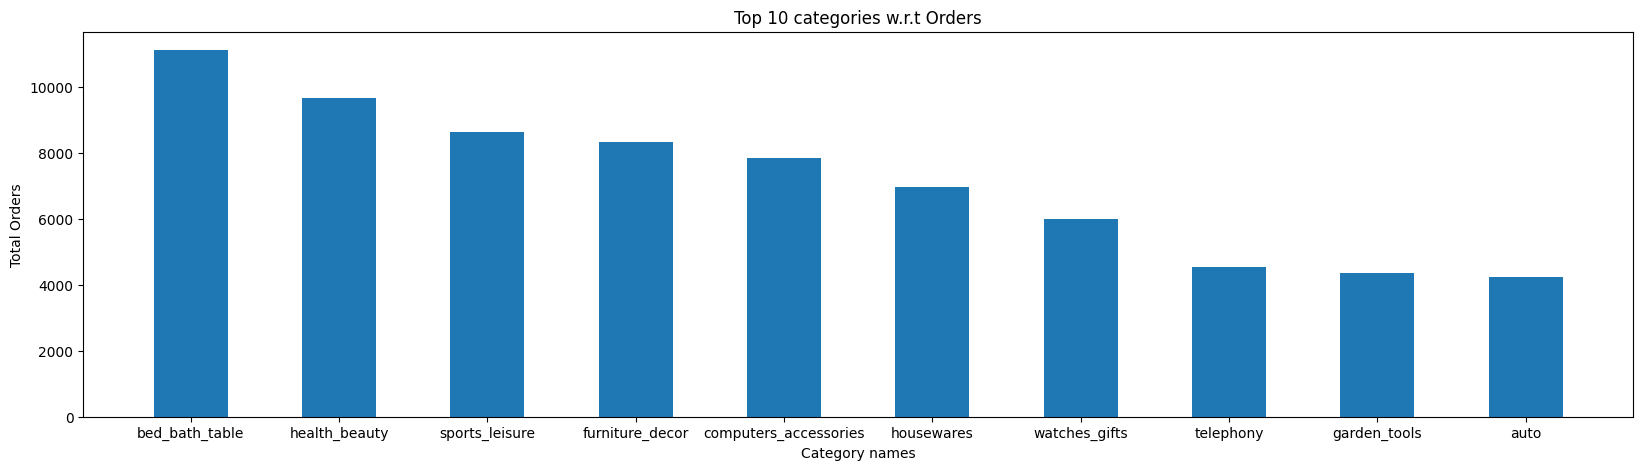

In [ ]:
# Visualization of top 10 categories w.r.t orders
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.title("Top 10 categories w.r.t Orders")
plt.xlabel("Category names")
plt.ylabel("Total Orders")
plt.bar(x=top_10_categories_wrt_orders['product_category_name_english'],height=top_10_categories_wrt_orders['total_orders'],width=0.5)
plt.show()

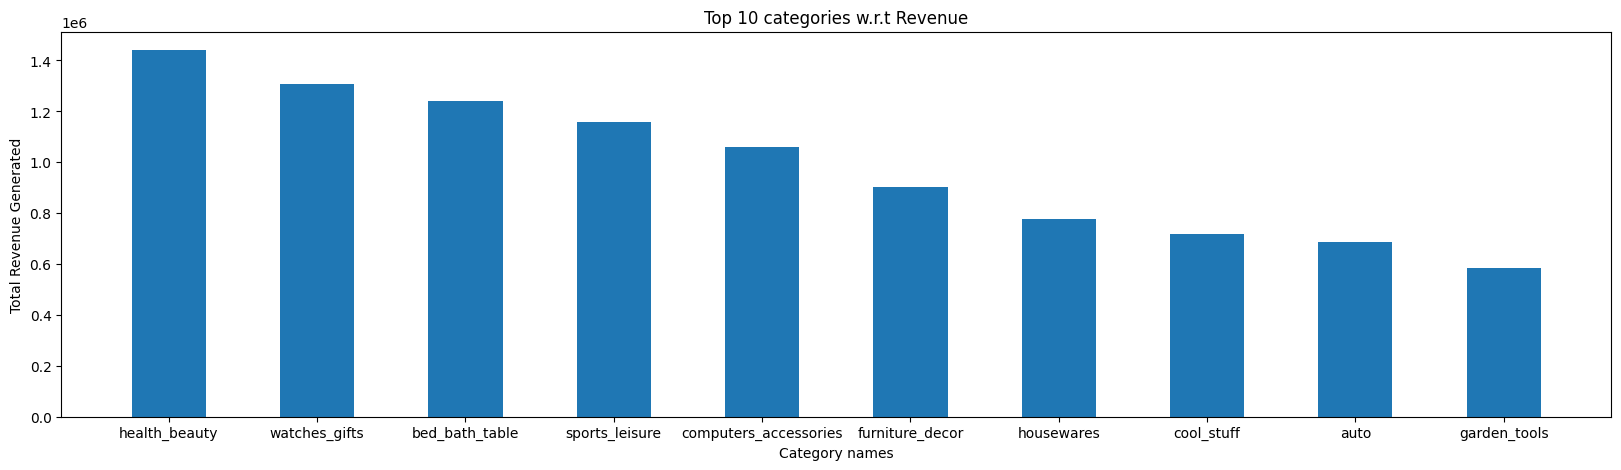

In [ ]:
# Visualization of top 10 categories w.r.t revenue
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.title("Top 10 categories w.r.t Revenue")
plt.xlabel("Category names")
plt.ylabel("Total Revenue Generated")
plt.bar(x=top_10_categories_wrt_revenue['product_category_name_english'],height=top_10_categories_wrt_revenue['total_price'],width=0.5)
plt.show()

In [ ]:
# Getting the dataframe wit total_revneu+total_orders values for better correlation finding
common_df=pd.read_sql_query("""SELECT
            pcnt.product_category_name_english,
            SUM(ot.price + ot.freight_value) AS total_revenue,
            COUNT(DISTINCT ot.order_id) AS total_orders
        FROM
            order_items AS ot
        INNER JOIN
            products AS p ON p.product_id = ot.product_id
        INNER JOIN
            product_category_name_translation AS pcnt 
                ON pcnt.product_category_name = p.product_category_name
        GROUP BY
            pcnt.product_category_name_english
        -- HAVING
            -- Filter out categories with extremely low volume/revenue for cleaner visualization
           --  total_orders > 100 AND total_revenue > 1000
        ORDER BY
            total_revenue DESC;
        """,connection)

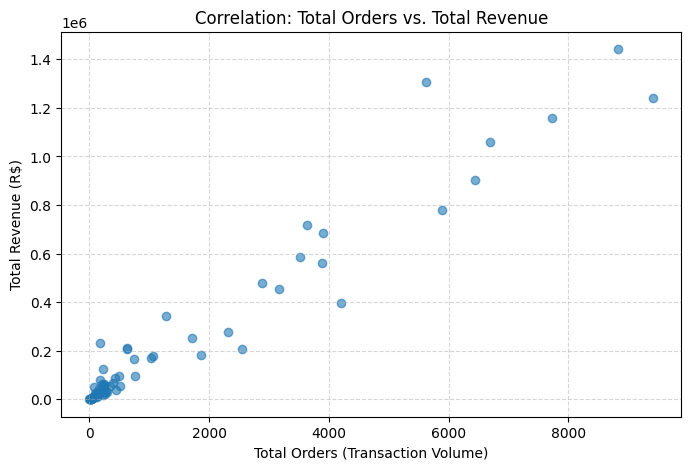

In [ ]:
# checking correlation between orders and total_price 
plt.figure(figsize=(8,5))
plt.title("Correlation: Total Orders vs. Total Revenue")
plt.xlabel('Total Orders (Transaction Volume)')
plt.ylabel('Total Revenue (R$)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.scatter(x=common_df['total_orders'],y=common_df['total_revenue'],alpha=0.6)
plt.show()

# le6 means each value of revenue is multiplied with 1,000,000

In [ ]:
# getting correlation value of two columns
correlation_value=common_df['total_orders'].corr(common_df['total_revenue'])
correlation_value

# A correlation value of $r = 0.9693$ shows that the two columns, Total Orders and Total Revenue, 
# are highly directly proportional (or strongly positively correlated) to each other.

np.float64(0.9693379835920782)

In [ ]:
products

,index,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
32946,32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45,67,2,12300.0,40.0,40.0,40.0
32947,32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41,971,1,1700.0,16.0,19.0,16.0
32948,32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50,799,1,1400.0,27.0,7.0,27.0
32949,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60,156,2,700.0,31.0,13.0,20.0


In [ ]:
# Does keeping high photos on website make the product high selling?
# To get this insight we have to find the correlation between products_photos_qty and total_orders column
common_df2=pd.read_sql_query("""Select p.product_id,
                             p.product_photos_qty as photos_quantity,
                             count(DISTINCT oi.order_id) as total_orders
                             from products as p
                             left join order_items as oi
                             on
                             oi.product_id=p.product_id
                             group by
                             p.product_id
                             """,connection)


In [ ]:
# removing null values in dataframe
common_df2.isnull().sum()
common_df2['photos_quantity']=common_df2['photos_quantity'].fillna(common_df2['photos_quantity'].mean())
common_df2.isnull().sum()

product_id         0
photos_quantity    0
total_orders       0
dtype: int64

In [ ]:
# converting data type of photos_quantity
common_df2['photos_quantity']=common_df2['photos_quantity'].astype("int32")
common_df2['photos_quantity'].dtype

dtype('int32')

In [ ]:
# Removing outliers of photos_quantity column by considering 6 as threshold as most of the products have photos less than or equal to 8
common_df2=common_df2[common_df2['photos_quantity']<=6]
common_df2['photos_quantity']

# outliers were removed and missing values were filled to ensure that no misleading insight 
# regarding dependency of orders on photos_quantity is obtained.

0        6
1        4
2        2
3        3
4        4
        ..
32946    1
32947    1
32948    3
32949    5
32950    3
Name: photos_quantity, Length: 32102, dtype: int32

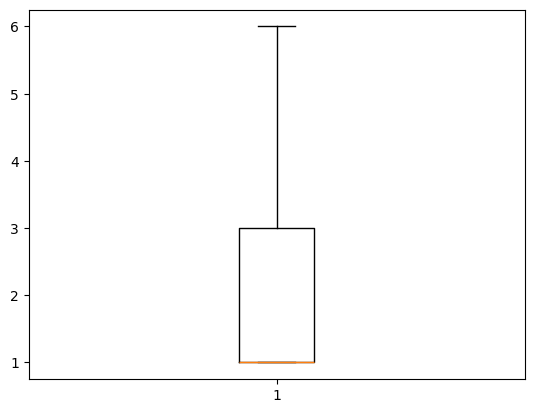

In [ ]:
# now checking for outliers in photos_quantity_column
plt.boxplot('photos_quantity',data=common_df2)
plt.show()

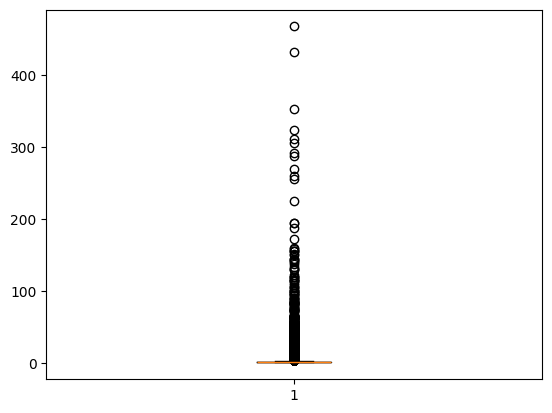

In [ ]:
# now checking for outliers in total_orders column
plt.boxplot('total_orders',data=common_df2)
plt.show()

# we are not removing outliers of total_orders column because it will lead to loss of 16.7% of data of most_selling products.


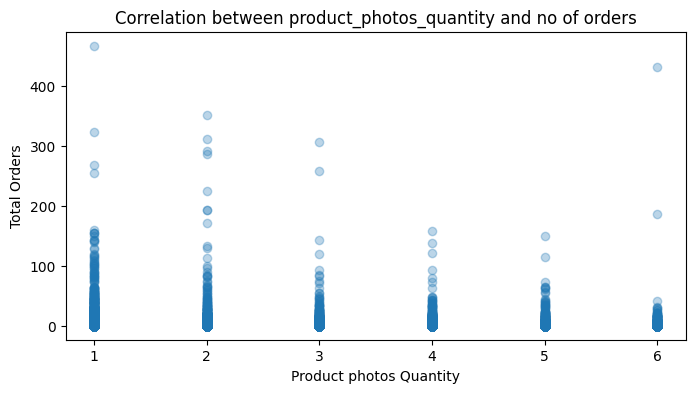

In [ ]:
# Creating its scatter plot
plt.figure(figsize=(8,4))
plt.title("Correlation between product_photos_quantity and no of orders")
plt.xlabel("Product photos Quantity")
plt.ylabel("Total Orders")
plt.scatter(x=common_df2['photos_quantity'],y=common_df2['total_orders'],alpha=0.3)

In [ ]:
# getting correlation coefficient
correlation_value2=common_df2['total_orders'].corr(common_df2['photos_quantity'])
correlation_value2 # .0108 obtained after cleaning photos_quantity column
# Based on this , we can say that orders_depends a little bit on photos_quantity of product but it is not only factore to improve orders.

np.float64(0.010890133296337517)

In [ ]:
# 4: Relationship between product_description length and product sell
common_df3=pd.read_sql_query("""Select p.product_id,
                             sum(ot.price+ot.freight_value) as total_sales,
                             p.product_description_length as description_length
                             from products as p
                             left join
                             order_items as ot
                             on
                             p.product_id=ot.product_id
                             group by p.product_id
                             order by total_sales Desc""",connection)
common_df3

,product_id,total_sales,description_length
0,bb50f2e236e5eea0100680137654686c,67606.10,2644.0
1,d1c427060a0f73f6b889a5c7c61f2ac4,60976.03,1893.0
2,6cdd53843498f92890544667809f1595,59093.99,625.0
3,99a4788cb24856965c36a24e339b6058,51071.60,245.0
4,d6160fb7873f184099d9bc95e30376af,50326.18,3632.0
...,...,...,...
32946,47a83ac845f953b889154d9963dbc1f8,10.88,608.0
32947,9334fc63bffa67f685c03b1dc24df180,10.48,152.0
32948,310dc32058903b6416c71faff132df9e,10.07,326.0
32949,d51e0a7f437c0d14f560082ed007fd85,9.95,47.0


In [ ]:
# Cleaning common_df3 to ensure that we get right insights and correlation between the column
## Checking for missing values
common_df3.isnull().sum()
common_df3['description_length']=common_df3['description_length'].fillna(common_df3['description_length'].mean())
common_df3.isna().sum()

# Most of the amount earned from those products which have less description.
# A little bit shown that increasing product description decreases the amount earned from product.

product_id            0
total_sales           0
description_length    0
dtype: int64

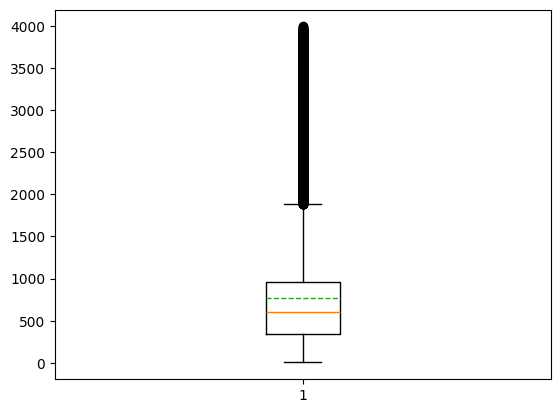

In [ ]:
# checking for outliers
plt.boxplot(data=common_df3,x='description_length',meanline=True,showmeans=True,showcaps=True,showbox=True)
plt.show()
# There are total 32951 rows out of 1842 are outliers(greater than 2000 threshold value)
common_df3=common_df3[common_df3['description_length']<2000]

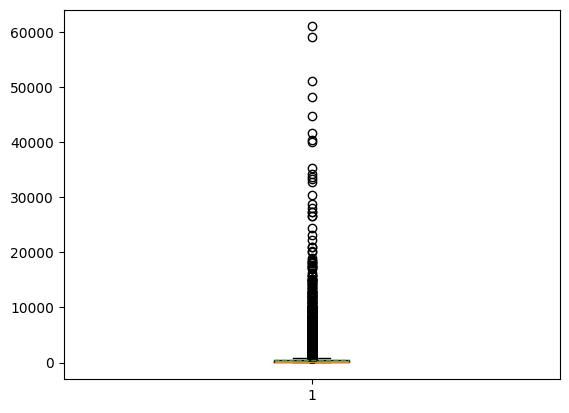

In [ ]:
# checking for outliers in total_sales column
plt.boxplot(data=common_df3,x='total_sales',meanline=True,showmeans=True,showcaps=True,showbox=True)
plt.show()

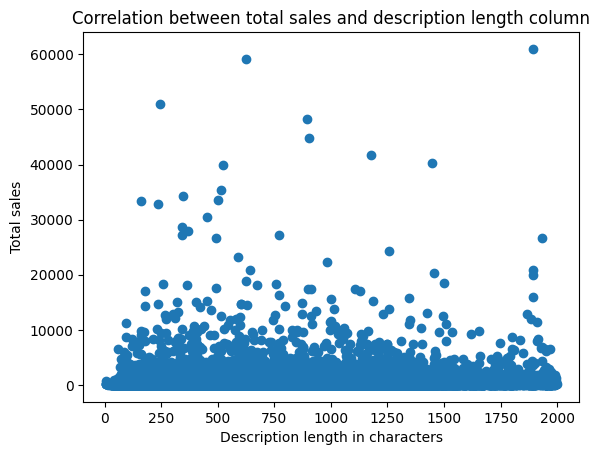

In [ ]:
# making correlation graph
plt.scatter('description_length','total_sales',data=common_df3)
plt.title("Correlation between total sales and description length column")
plt.xlabel("Description length in characters")
plt.ylabel("Total sales")
plt.show()

In [ ]:
# Getting correlation value not just using pearson correlation coefficient method but also by spearman and kendall method.
corr_value_using_spearman=common_df3['total_sales'].corr(common_df3['description_length'],method='spearman')
corr_value_using_kindall=common_df3['total_sales'].corr(common_df3['description_length'],method='kendall')
print(corr_value_using_spearman)
print(corr_value_using_kindall)

0.1469901662067968
0.09829505529652352


In [ ]:
# 5.Which is the most done payment method by number of payments made by that method?
sorted_order_payment_methods=pd.read_sql_query("""Select payment_type as payment_method,
                                               count(order_id) as no_of_orders
                                               from order_payments
                                               group by 
                                               payment_type
                                               order by
                                               no_of_orders desc""",connection)

sorted_order_payment_methods=sorted_order_payment_methods[~(sorted_order_payment_methods['payment_method']=='not_defined')]
sorted_order_payment_methods

,payment_method,no_of_orders
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529


In [ ]:
plt.pie()

TypeError: pie() missing 1 required positional argument: 'x'

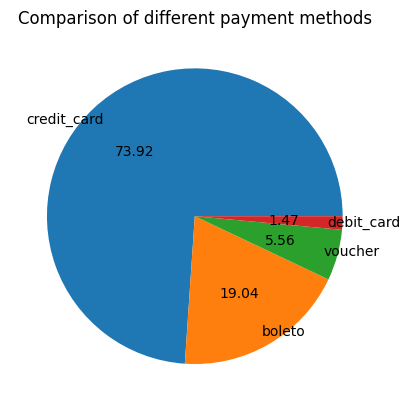

In [ ]:
# visualization
plt.title("Comparison of different payment methods")
plt.pie(data=sorted_order_payment_methods,x=sorted_order_payment_methods['no_of_orders'], 
        labels=sorted_order_payment_methods['payment_method'],labeldistance=0.9,autopct="%.2f")
plt.show()


#labeldistance mentions how muchthe labels should be far from center of pie.

In [ ]:
# 6.Which payment method is accepted and widely used for paying very high amount?
method_for_highest_amount=pd.read_sql_query("""SELECT 
    payment_type,
    COUNT(payment_type) as frequency_of_use
FROM 
    order_payments
WHERE 
    payment_value > 5000 -- Example threshold for "very high amount"
GROUP BY 
    payment_type
ORDER BY 
    frequency_of_use DESC;
""",connection)

method_for_highest_amount

,payment_type,frequency_of_use
0,boleto,4
1,credit_card,2


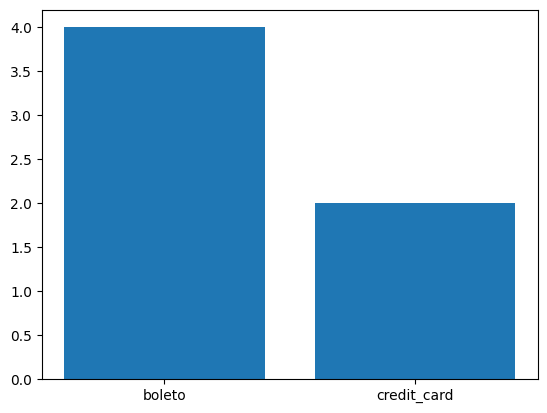

In [ ]:
plt.bar(x=method_for_highest_amount['payment_type'],height=method_for_highest_amount['frequency_of_use'],data=method_for_highest_amount)
plt.show()

In [ ]:
# 7.Which is the most frequent order status and why(if cancelled is on top)?
most_frequent_order_status=orders['order_status'].value_counts()
most_frequent_order_status

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

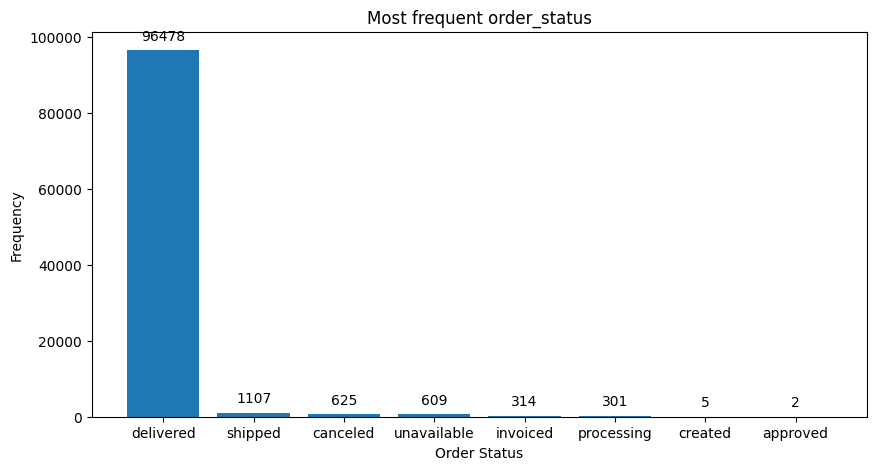

In [ ]:
# visualizaing the most frequent 
plt.figure(figsize=(10,5))
plt.title("Most frequent order_status")
plt.xlabel("Order Status")
plt.ylabel("Frequency")
bars=plt.bar(x=most_frequent_order_status.index,height=most_frequent_order_status.values)
plt.bar_label(bars,padding=5,fmt="%d")
plt.show()

In [29]:
top_states_cancellations=pd.read_sql_query("""Select customer_id from customers""",connection)

In [35]:
customers

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...,...
99436,99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [39]:
# Which state has high number of cancellations
top_states_cancellations=pd.read_sql_query("""Select c.customer_state,
                                           count(o.order_status) as cancelled_orders
                                           from customers as c
                                           inner join
                                           orders as o
                                           on 
                                           o.customer_id=c.customer_id
                                           where order_status='canceled'
                                           group by c.customer_state
                                           order by cancelled_orders desc
                                           limit 10
                                           """,connection)
top_states_cancellations

,customer_state,cancelled_orders
0,SP,327
1,RJ,86
2,MG,64
3,RS,25
4,PR,22
5,SC,19
6,BA,16
7,GO,13
8,ES,9
9,DF,7


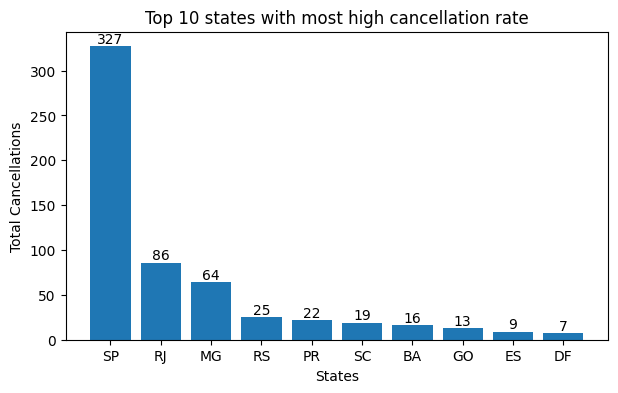

In [48]:
# Visualization
plt.figure(figsize=(7,4))
plt.title("Top 10 states with most high cancellation rate")
plt.xlabel("States")
plt.ylabel("Total Cancellations")
bar_chart=plt.bar(x=top_states_cancellations['customer_state'],height=top_states_cancellations['cancelled_orders'])
plt.bar_label(bar_chart,fmt="%d",label_type='edge')
plt.show()


In [45]:
# 9.The state with top cancellation number are also the states with high number of orders
top_states_by_totalorders=pd.read_sql_query("""Select c.customer_state,
                                           count(o.order_status) as total_orders
                                           from customers as c
                                           inner join
                                           orders as o
                                           on 
                                           o.customer_id=c.customer_id
                                           -- where order_status='canceled'
                                           group by c.customer_state
                                           order by total_orders desc
                                           limit 10
                                           """,connection)
top_states_by_totalorders

,customer_state,total_orders
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


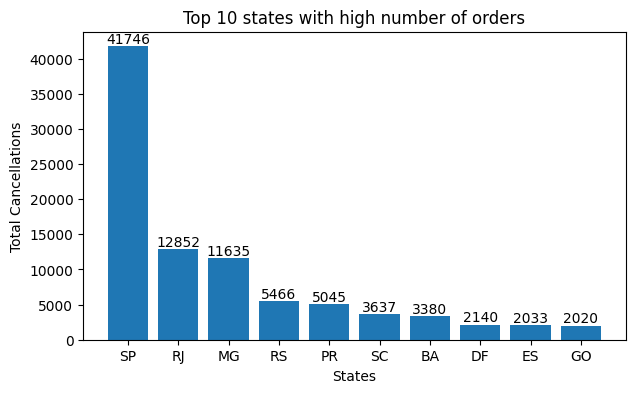

In [ ]:
# Visualization
plt.figure(figsize=(7,4))
plt.title("Top 10 states with high number of orders")
plt.xlabel("States")
plt.ylabel("Total Cancellations")
bar_chart=plt.bar(x=top_states_by_totalorders['customer_state'],height=top_states_by_totalorders['total_orders'])
plt.bar_label(bar_chart,fmt="%d",label_type='edge')
plt.show()
# top 3 states are same in both charts while 4th and 5th interchange eachother and performance in GO state is good as it is 10th w.r.t to total orders
# but 8th w.r.t cancelled orders, while DF state is inverse of it

In [ ]:
# What is the average delivery time for all orders
date_extracted=pd.read_sql_query("""Select DATE(order_delivered_customer_date) as delivery_date,
                                    DATE(order_purchase_timestamp) as purchase_date
                                    from orders""",connection)
tenure=pd.to_datetime(date_extracted['delivery_date']) - pd.to_datetime(date_extracted['purchase_date'])
# tenure.isnull().sum() # 2965
# tenure.shape # 99441
# as 2965 becomes 3% of total data so we will remove that 2965 that rows with msising values to avoid errors
tenure.dropna(inplace=True)

average_delivery_time=sum(tenure.values/86400000000000)/max(tenure.index)+1
average_delivery_time=str(average_delivery_time)[0:2]
print("Average delivery time for orders from purchasing date to delivery received to customer is",average_delivery_time,'days')

# To convert a value in nanoseconds to days, you divide it by 86,400,000,000,000.#

Average delivery time for orders from purchasing date to delivery received to customer is 13  days


In [ ]:
# Top 10 states with best delivery time history